# Bracketing

This is a technique to determine the local minimum within an interval. In the event a derivative does not exist, this type of technique works.

## Utility Functions

Below will setup a viewable plotting function.

In [1]:
using Plots
using OptiMize: plot_min_of_f

## Types of Bracketing

Let's start with a simple univariate bracketing method to find the local minimum. The univarite function must be convex, if it is not this method will not work (i.e., $e^x$ will fail).

1. **bracket_univariate_minimum**
    1. Inputs: a function, starting x position 0, s step size, and k expansion factor. 
    1. Outputs: a bracket interval [a,c]

In [2]:
using OptiMize: bracket_univariate_minimum

f(x) = sin(x)

interval, anim = bracket_univariate_minimum(f)

println("Bracket minimum search", interval)

Bracket minimum search(-2.55, -0.6300000000000001)


┌ Info: Saved animation to C:\Users\dakre\AppData\Local\Temp\jl_MVqB67IHct.gif
└ @ Plots C:\Users\dakre\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\dakre\\AppData\\Local\\Temp\\jl_MVqB67IHct.gif")
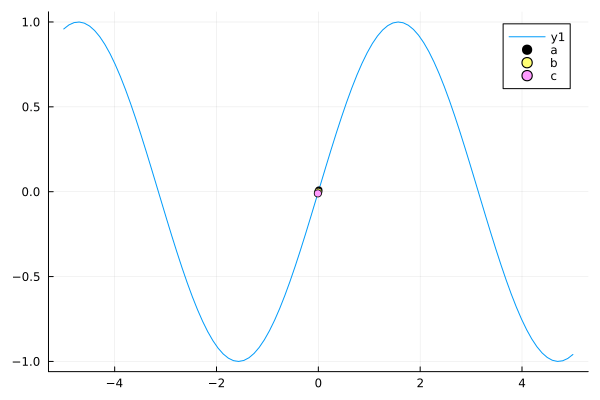

In [3]:
gif(anim, fps = 4)

2. **Fibonnaci Search**
    1. In this type of search we essentially recursively call into fibonacci sequence to solve the problem breaking it into sub problems to be solved (this breaks the interval down by a third each step). 
    $$
    F_n
    = 
    \begin{cases}
    1 \text{ if } n <= 2\\
    F_{n-1} + F_{n-2} \text{ otherwise }
    \end{cases}
    $$
    2. Alternatively you can solve the fibonacci search by utilizing *binet's formula*
        
        $F_n = (Φ^n - (1 - Φ)^n) / √(5)$ where $Φ = (1 + √(5)) / 2 = 1.61803$ which is the *golden ratio*
        
        $s = F_n / F_{n-1} = (1 - √(5)) / (1 + √(5)) = -0.382$ where s is the ratio beween current and prior fibonacci values

In [4]:
using OptiMize: fibonacci_search

f(x) = x^2 + 5x + 6

(min_x, min_value), anim = fibonacci_search(f, -10., 10., 10)
println("Minimum at x = $min_x, f(x) = $min_value")

Initial ratios 

0.38235294117647056 0.6176470588235294


Minimum at x = -2.3529411764705888, f(x) = -0.22837370242214572


┌ Info: Saved animation to C:\Users\dakre\AppData\Local\Temp\jl_8liVALKP85.gif
└ @ Plots C:\Users\dakre\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\dakre\\AppData\\Local\\Temp\\jl_8liVALKP85.gif")
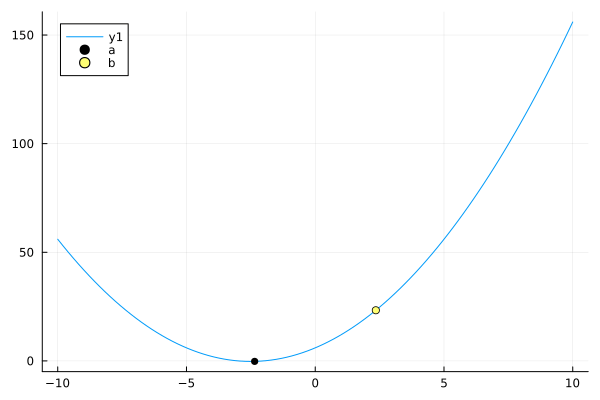

In [5]:
gif(anim, fps = 4)

3. **Golden Search**
    1. Instead of generating a fibonacci sequence and then solve the search to n; lets solve using the golden ratio directly.

In [6]:
using OptiMize: golden_search

f(x) = x^2 + sin(x)^3 / x

interval, anim = golden_search(f, -10., 10., 10)
println("Golden search interval ", interval)

Golden search interval (-0.13155617496424915, 0.1315561749642482)


┌ Info: Saved animation to C:\Users\dakre\AppData\Local\Temp\jl_Ehu1yPiZMx.gif
└ @ Plots C:\Users\dakre\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\dakre\\AppData\\Local\\Temp\\jl_Ehu1yPiZMx.gif")
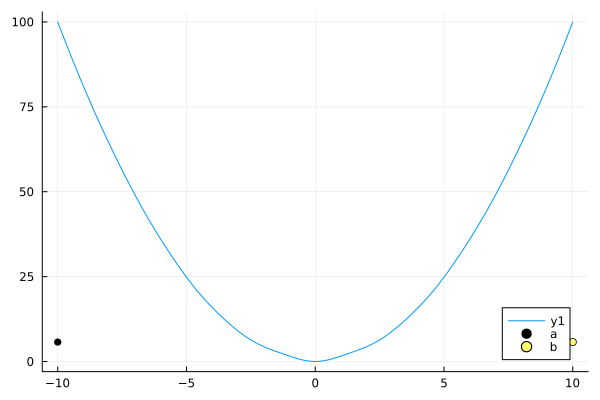

In [7]:
gif(anim, fps = 4)

4. **Quadratic Fit**
    1. In this type of search we seek solve a convex function via iterative fitting of a quadratic function. Following the similar fashion as before with bracketing, use three variables $x_1, x_2, x_3$ and then find the coefficients $a < b < c$ that go through points $(x_1, y_1), (x_2, y_2), (x_3, y_3)$
    
        $q(x) = a + b*x + c*x^2$

        $y_1 = a + x_1*b + x_1*c^2$

        $y_2 = a + x_2*b + x_2*c^2$

        $y_3 = a + x_3*b + x_3*c^2$
        
    2. Setup a matrix describing these systems of equations

    \begin{equation}
    [y_1, y_2, y_3] = 
    \begin{pmatrix}
      1 & x_1 & x_1^2 \\
      1 & x_2 & x_2^2 \\
      1 & x_3 & x_3^2 
    \end{pmatrix}
    \begin{pmatrix}
    a \\ b \\ c
    \end{pmatrix}
    \end{equation}

    3. To solve for the coefficients $p_1, p_2, p_3$ we'll have to invert the matrix (thus we need to enforce positive semidefinite on the points a, b, c)
    
     \begin{equation}
    [a, b, c] = 
    \begin{pmatrix}
      1 & x_1 & x_1^2 \\
      1 & x_2 & x_2^2 \\
      1 & x_3 & x_3^2 
    \end{pmatrix}^{-1}
    \begin{pmatrix}
    y_1 \\ y_2 \\ y_3
    \end{pmatrix}
    \end{equation}   

In [8]:
using OptiMize: quadratic_fit_search

f(x) = cos(x)^2 + 2

x_min, y_min, anim = quadratic_fit_search(f, -1., 2., 10)
println("Quadratic search minimum ", x_min, " ", y_min)

Quadratic search minimum 1.5637675965159314 2.000049402235786


┌ Info: Saved animation to C:\Users\dakre\AppData\Local\Temp\jl_2n6ZmdWdUF.gif
└ @ Plots C:\Users\dakre\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\dakre\\AppData\\Local\\Temp\\jl_2n6ZmdWdUF.gif")
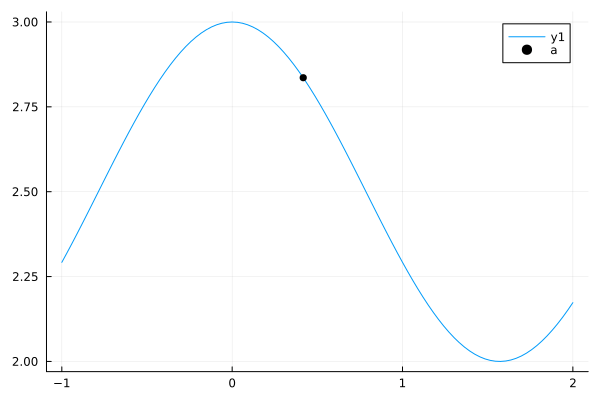

In [9]:
gif(anim, fps = 4) # todo some overshooting occuring pending on function

5. **Shubert-Piyavaskii Method**
    1. Midpoint sampling
        1. In this function we iteratively sample the midpoint of a bounds $[a, b]$ by taking the midpoint $(a + b) / 2$
        2. We then construct a lower bounds function based on the Lipshitz constant $l$ where this describe the slope of a line intersecting with the midpoint-- $f(x_0) - l(x - x_0)$ for x > x_0 and $f(x_1) + l(x + x_0)$ for x < x_0
        3. Update uncetainty interval $[x^i - 1/l * (y_min - y^i), x^i + 1/l * (y_min + y^i)]$
        4. Repeat (1) through (3) until convergence is met (typically minimum falling within a threshold defined by ε)

In [10]:
# TODO code

6. **Bisection Method**
    1. This method is used to find roots of a function by taking the function $f(x)$ and evaluating the derivative at zero $f'(x) = 0$ which determines a local minimum
    2. The function requires a bracket [a,b] where a root is known to exist
    3. Main intuition here is if $f(a)$ sign not equal to $f(b)$ then a root is guaranteed to exist
    4. Convergence guarantee on $ln(|a - b| / ε)$
    5. a & b must be on opposite side of zero 

In [11]:
# TODO code